# MXNet (From Scratch)

In [1]:
import mxnet as mx
from mxnet import nd
import matplotlib.pyplot as plt

ctx = mx.gpu()

# Understanding Deconvolution with Padding

## Getting the data

In [2]:
mnist = mx.gluon.data.vision.MNIST()

(28, 28)


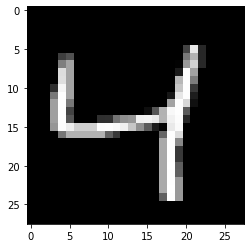

In [3]:
image, _ = mnist[2]

image = image.flatten().astype('float32')

print(image.shape)

plt.imshow(image.asnumpy(), cmap = 'gray')
plt.show()

In [4]:
def deconvolution_with_padding(image, kernel, padding):
    filter_hight, filter_width = kernel.shape
    hight, width = (image.shape[0] - 1) + filter_hight, (image.shape[1] - 1) + filter_width
    layer = nd.zeros((int(hight), int(width)))

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            layer[i: i + filter_hight, j: j + filter_width] += image[i, j] * kernel

    layer = layer[padding[0]:]
    layer = layer[:-padding[0]]
    layer = layer[:, padding[1]:]
    layer = layer[:, :-padding[1]]
    return layer

## Below we are generating image of shape (28, 28)

When padding was (0, 0) then ouptut shape was (30, 30). Setting padding shape to (p, p), the output shape will be (30 - 2p, 30 - 2p).

Subtracting 2p from rows because p padding means removing first p rows and last p rows from output, so total rows removed are 2p.
Same is true for columns, obviously.

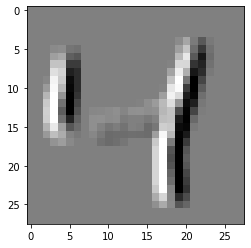

(28, 28)

In [5]:
kernal = nd.array([[1.0, 0.0, -1.0],
                   [1.0, 0.0, -1.0],
                   [1.0, 0.0, -1.0]])

output = deconvolution_with_padding(image, kernal, (1, 1))

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape

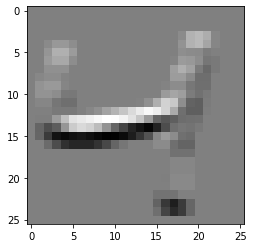

(26, 26)

In [6]:
kernal = nd.array([[1, 1, 1],
                   [0, 0, 0],
                   [-1, -1, -1]])

output = deconvolution_with_padding(image, kernal, (2, 2))

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape # note the output shape

## Lets see some more examples with different types of filters.

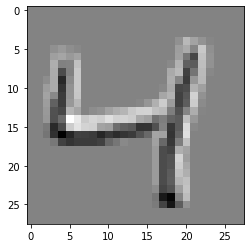

(28, 28)

In [7]:
kernal = nd.random.normal(0, 1, (3, 3))

output = deconvolution_with_padding(image, kernal, (1, 1))

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape

## Time to check out a 5 by 5 random filter

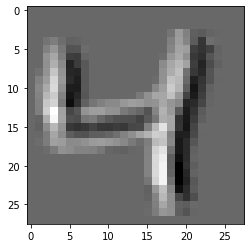

(28, 28)

In [8]:
kernal = nd.random.normal(0, 1, (5, 5))

output = deconvolution_with_padding(image, kernal, (2, 2))

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape

## Lets try one more time

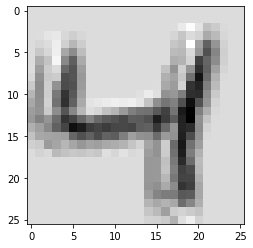

(26, 26)

In [9]:
kernal = nd.random.normal(0, 1, (5, 5))

output = deconvolution_with_padding(image, kernal, (3, 3))

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape

## Lets try 7 by 7 this time

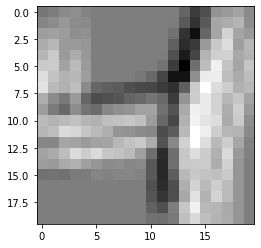

(20, 20)

In [10]:
kernal = nd.random.normal(0, 1, (7, 7))

output = deconvolution_with_padding(image, kernal, (7, 7))

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape